In [101]:
#Marée Maxime 27361900
#Imports utiles
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.bandstructure import*
from pymatgen.electronic_structure.plotter import*

In [92]:
#Téléchargement du fichier CIF de la structure de bandes électroniques
with MPRester("rzFNAXwVskd5hQE3") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-567681")

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

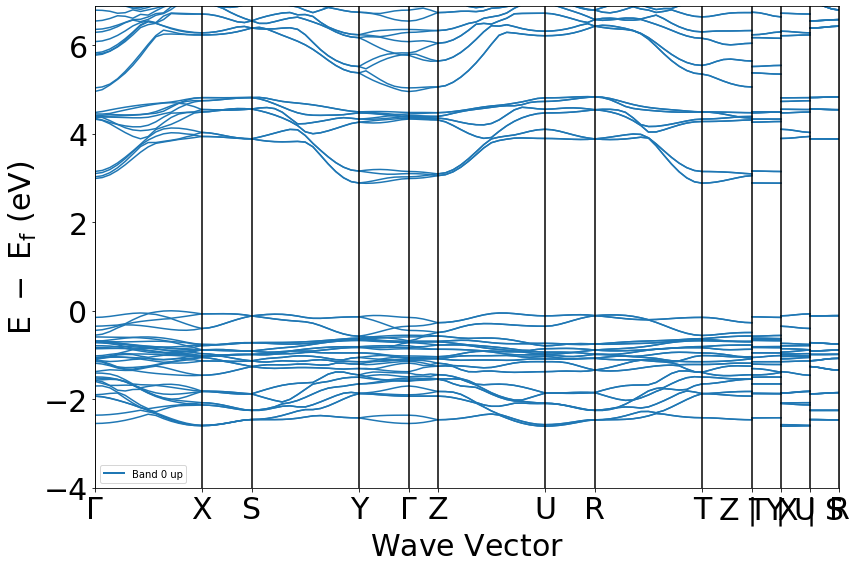

In [93]:
bandplot = BSPlotter(bandstructure)
bandplot.get_plot()

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

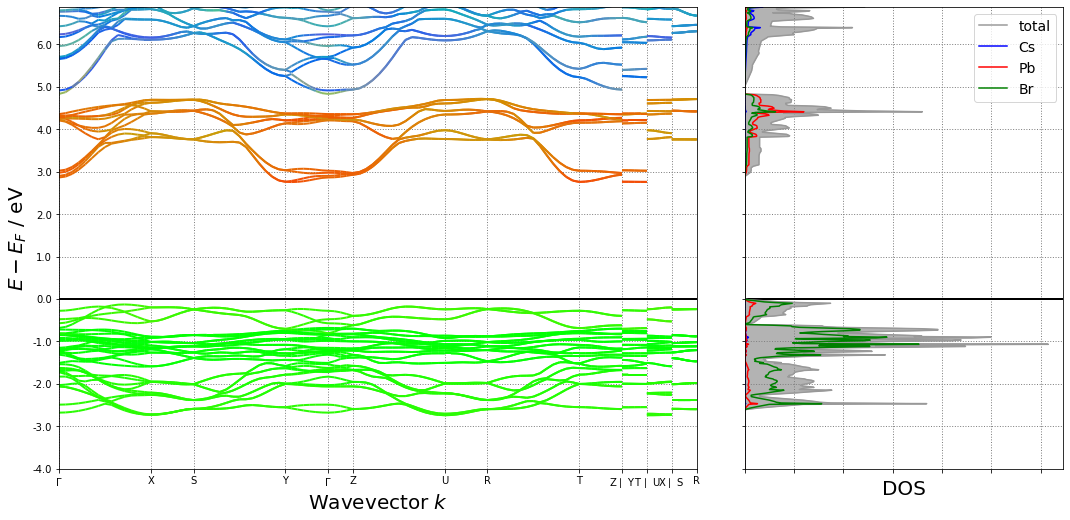

In [94]:
bsdosplot = BSDOSPlotter(bs_projection = "elements", dos_projection = "elements",egrid_interval =1,axis_fontsize = 20,tick_fontsize = 10, legend_fontsize = 14, bs_legend=None, dos_legend='best', rgb_legend = False,fig_size= (18, 8.5))
dos = m.get_dos_by_material_id("mp-567681")
bsdosplot.get_plot(bandstructure,dos=dos)

In [95]:
### Récup de données 
data = bandplot.bs_plot_data()
distance = data.get('ticks').get('distance') 
distances = data.get('distances') 
energy = data.get('energy') 

In [96]:
bandinter = bandstructure.get_band_gap()
typegap = ""
#On regarde s'il s'agit d'un gap direct ou indirect
if bandinter['direct'] == False :
    typegap = "indirecte"
else :
    typegap = "directe"
    
print("La bande interdite a un gap",typegap,"de",bandinter['energy'],"eV")
print("On observe cette bande interdite quand le vecteur d'onde k évolue dans la direction", bandinter['transition'])

La bande interdite a un gap indirecte de 2.8824 eV
On observe cette bande interdite quand le vecteur d'onde k évolue dans la direction (0.357,0.000,0.000)-(0.000,0.429,0.000)


In [97]:
#1) Les numéros des bandes de valences via the valence band maximum (VBM) and the conduction band minimum (CBM)
list_cbm = []
list_vbm = []
for cbm in bandstructure.get_cbm() ['band_index'].items() :
    list_cbm = cbm[1]
for vbm in bandstructure.get_vbm() ['band_index'].items() :
    list_vbm = vbm[1] 

In [98]:
print("La première bande de valence atteignant le VBM est la bande",list_vbm[0])

La première bande de valence atteignant le VBM est la bande 87


In [99]:
print("La première bande de conduction est la bande",list_cbm[0])

La première bande de conduction est la bande 88


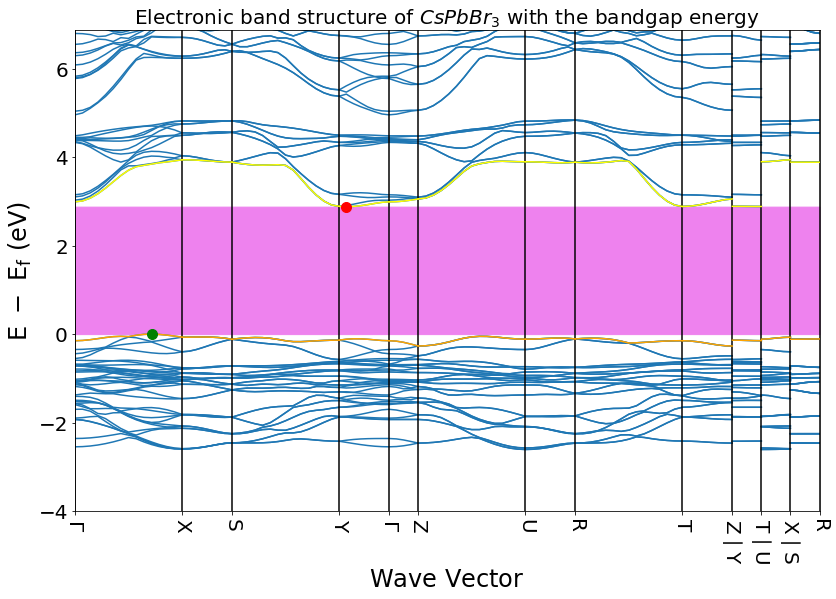

In [100]:
# Pour mettre la structure de bandes sur le graph
bandplot.get_plot()

# Pour mettre en evidence la bande de valence atteignant le VBM et la première bande de conduction
for i in range(len(distances)):
    plt.plot(distances[i],energy.get('1')[i][87],'orange')
    plt.plot(distances[i],energy.get('1')[i][88],'yellow')

vbms = data.get('vbm')
cbms = data.get('cbm')

# Représentation des vbms
for j in range(len(vbms)):
    x, y= vbms[j]
    plt.plot(x, y, 'og', markersize=10)
# Représentation des cbms
for k in range(len(cbms)):
    x, y = cbms[k]
    plt.plot(x ,y ,'or',markersize=10)
    
# Tracer la bande interdite 
plt.fill_between(np.linspace(distance[0], distance[-1], 1000), 0, bandinter.get('energy'), color = "violet")

##Working on the axis
plt.xlabel(r'$\mathrm{Wave\ Vector}$', fontsize=24)
plt.xticks(fontsize=20, rotation=270)
plt.ylabel(r'$\mathrm{E\ -\ E_f\ (eV)}$', fontsize=24)
plt.yticks(fontsize=20)

ax = plt.gca()
ax.get_legend().remove()

plt.title('Electronic band structure of $CsPbBr_3$ with the bandgap energy',fontsize=20)
plt.savefig("electronicbandcspbbr3.png")